## Final Project Submission

Please fill out:
* Student name: Joe Sanchez
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

In [2]:
c = sns.plotting_context("notebook", font_scale=1.5)
st = sns.axes_style("whitegrid")
sns.set_theme(style="darkgrid", context=c, palette="crest") 

In [3]:
df1 = pd.read_csv('Dataset-1.csv')
df2 = pd.read_csv('Dataset-2.csv')
df3 = pd.read_csv('Dataset-3.csv')

In [4]:
value_count_perc = np.round(df1['status_group'].value_counts(normalize=True),2)
print(value_count_perc)

functional                 0.54
non functional             0.38
functional needs repair    0.07
Name: status_group, dtype: float64


Text(1000, 0.0, '0.07')

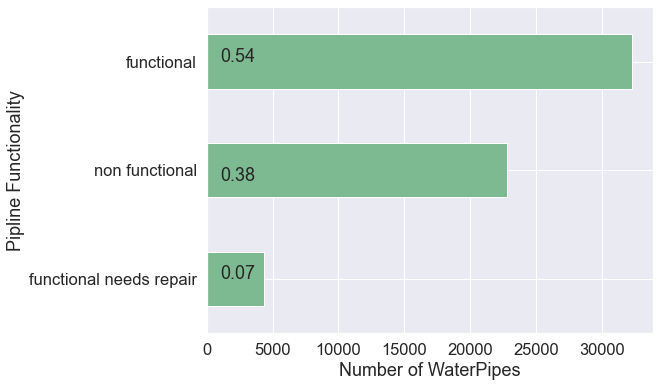

In [5]:
plt.figure(figsize=(8,6))
df1.status_group.value_counts().sort_values().plot(kind='barh')
plt.xlabel('Number of WaterPipes')
plt.ylabel('Pipline Functionality')
plt.text(1000,2,value_count_perc[0])
plt.text(1000,.9,value_count_perc[1])
plt.text(1000,.0,value_count_perc[2])

In [6]:
pysqldf = lambda q: sqldf(q, globals())

In [7]:
d = """SELECT * FROM df1
       JOIN df2
       ON df1.id = df2.id;"""

In [8]:
df = pysqldf(d)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df

,id,status_group,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1.0,GeoData Consultants Ltd,VWC,Roman,0.0,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,None,1.0,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1.0,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1.0,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1.0,GeoData Consultants Ltd,VWC,None,1.0,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,1.0,GeoData Consultants Ltd,None,None,1.0,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,1.0,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,1.0,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,1.0,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,1.0,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,37057,0.0,2011-04-11,None,0,None,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,1.0,GeoData Consultants Ltd,VWC,None,0.0,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,1.0,GeoData Consultants Ltd,VWC,None,1.0,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [11]:
## one hot code for getting rid of duplicated columns which in this case was the 'id' column
DF = df.loc[:,~df.columns.duplicated()].copy()

In [12]:
DF.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1.0,GeoData Consultants Ltd,VWC,Roman,0.0,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,None,1.0,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1.0,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1.0,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1.0,GeoData Consultants Ltd,VWC,None,1.0,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,1.0,GeoData Consultants Ltd,None,None,1.0,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [13]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [14]:
bool_series = pd.isnull(DF['permit'])

DF[bool_series]

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43,19282,non functional,0.0,2013-01-15,None,1642,None,34.967789,-4.628921,Mvae Primary,0,Internal,Mwarufyu,Singida,13,2,Singida Rural,Merya,1,1.0,GeoData Consultants Ltd,VWC,K,NaN,1980,mono,mono,motorpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
47,13620,functional,0.0,2011-07-27,None,0,None,33.540607,-9.172905,Mahakamani,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,1.0,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
65,51072,non functional,0.0,2013-02-09,None,1415,None,34.621598,-5.173136,Nyambi,0,Internal,Mfumbu,Singida,13,2,Singida Rural,Naintiri,1,1.0,GeoData Consultants Ltd,VWC,M,NaN,1970,mono,mono,motorpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
109,7116,functional,0.0,2011-07-12,None,0,None,33.805081,-9.130674,Kwa Mzee Kaiga,0,Lake Nyasa,Ipuguso,Mbeya,12,4,Rungwe,Lutebe,0,1.0,GeoData Consultants Ltd,VWC,N,NaN,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
118,10837,functional,0.0,2012-10-29,Hesawa,1339,Hesawa,34.448645,-2.022663,Tattabigo Shule Ya Msingi,0,Lake Victoria,Mwebebonda,Mara,20,2,Serengeti,Natta,600,0.0,GeoData Consultants Ltd,Other,None,NaN,1997,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59339,1209,functional,0.0,2011-07-08,None,0,None,33.654516,-9.312477,Kwa Mzee Gwalugano,0,Lake Nyasa,Katumba,Mbeya,12,4,Rungwe,Mpuguso,0,1.0,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
59344,6450,functional,0.0,2013-10-03,None,1303,None,36.900911,-3.111477,Pentecoste Swidish,0,Internal,Madukani,Arusha,2,7,Meru,Ngarenanyuki,230,NaN,GeoData Consultants Ltd,None,None,NaN,0,gravity,gravity,gravity,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,spring,spring,groundwater,communal standpipe,communal standpipe
59357,46563,non functional,0.0,2013-02-19,None,1635,None,34.971841,-5.098362,Shabani,0,Internal,Mampando A,Singida,13,2,Singida Rural,Ntuntu,1,1.0,GeoData Consultants Ltd,VWC,None,NaN,1980,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump
59366,55232,functional,0.0,2013-02-02,None,1541,None,34.765729,-5.027725,Joshoni,0,Internal,Mungumaho,Singida,13,2,Singida Rural,Puma,200,1.0,GeoData Consultants Ltd,VWC,None,NaN,2000,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [15]:
DF['funder'].fillna('No Funder', inplace=True)
DF['installer'].fillna('No Installer', inplace=True)
DF['subvillage'].fillna('No Subvillage', inplace=True)
DF['public_meeting'].fillna(0.0, inplace=True)
DF['scheme_management'].fillna('None', inplace=True)
DF['scheme_name'].fillna('None', inplace=True)
DF['permit'].fillna('No Permit', inplace=True)

In [16]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 59400 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              59400 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59400 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [17]:
DF_Needs_Repair = DF[DF['status_group'] == 'functional needs repair']

In [18]:
DF.drop(DF.index[DF['status_group'] == 'functional needs repair'], inplace=True)

In [19]:
DF

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1.0,GeoData Consultants Ltd,VWC,Roman,0,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,0.0,GeoData Consultants Ltd,Other,None,1,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1.0,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1.0,GeoData Consultants Ltd,VWC,None,1,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,1.0,GeoData Consultants Ltd,None,None,1,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,1.0,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,1,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,1.0,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,1,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,No Funder,0,No Installer,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,1.0,GeoData Consultants Ltd,VWC,None,0,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,1.0,GeoData Consultants Ltd,VWC,None,1,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [20]:
# COLUMN DOCUMENTATION (NOT INCLUDING 'id' AND 'status_group')
# ---------------------------------------------------------------------------------
# amount_tsh - Total static head (amount water available to waterpoint)
# date_recorded - The date the row was entered
# funder - Who funded the well
# gps_height - Altitude of the well
# installer - Organization that installed the well
# longitude - GPS coordinate
# latitude - GPS coordinate
# wpt_name - Name of the waterpoint if there is one
# num_private -
# basin - Geographic water basin
# subvillage - Geographic location
# region - Geographic location
# region_code - Geographic location (coded)
# district_code - Geographic location (coded)
# lga - Geographic location
# ward - Geographic location
# population - Population around the well
# public_meeting - True/False
# recorded_by - Group entering this row of data
# scheme_management - Who operates the waterpoint
# scheme_name - Who operates the waterpoint
# permit - If the waterpoint is permitted
# construction_year - Year the waterpoint was constructed
# extraction_type - The kind of extraction the waterpoint uses
# extraction_type_group - The kind of extraction the waterpoint uses
# extraction_type_class - The kind of extraction the waterpoint uses
# management - How the waterpoint is managed
# management_group - How the waterpoint is managed
# payment - What the water costs
# payment_type - What the water costs
# water_quality - The quality of the water
# quality_group - The quality of the water
# quantity - The quantity of water
# quantity_group - The quantity of water
# source - The source of the water
# source_type - The source of the water
# source_class - The source of the water
# waterpoint_type - The kind of waterpoint
# waterpoint_type_group - The kind of waterpoint

In [21]:
# COLUMNS TO BE EXAMINED/REMOVED:

# REMOVED
#----------------------------------------------------
# id - (irrelevant)
# date_recorded - (date of entry seems irrelivant)
# num_private - (no entries, no documentation)
# region_code - (already a region geographic location)
# district_code - (already a region geographic location)
# lga - (already a region geographic location)
# ward - (already a region geographic location)
# population - (ran the value_counts, found out that 40% of the input values are 0 and 12% are values of 1)
# recorded_by - (all input values are by "GeoData Consultants")
# scheme_name - (ran the value_counts, found out that 48% of the input values are null)
# extraction_type - (to lessen complexity while still keeping relevant extraction source, contains 18 categories)
# extraction_type_group - (to lessen complexity while still keeping relevant extraction source, contains 13 categories)
# management_group - (value_counts showed 88% of input values were "user_group")
# payment_type - (displays the same values as "payment" with less description)
# quality_group - (seems to have generalized the quality of the water, whereas )
# quantity_group - (displays same values as "quantity")
# source - (to lessen complexity)
# source_class - (too vague)
# waterpoint_type_group - (Only difference compared to "waterpoint_type" is communal standpipe and communal standpipe multiple are combined)

# EXAMINED
#---------------------------------------------------
# longitude - (plot with latitude to create a numeric column with values reflecting x/y coordinates)
# latitude - (plot with longitude to create a numeric column with values reflecting x/y coordinates)

In [22]:
columns_tobe_dropped = DF[['id','date_recorded','num_private','region_code','district_code','lga','ward','population','recorded_by','scheme_name',
                         'extraction_type','extraction_type_group','management_group','payment_type','quality_group','quantity_group',
                          'source','source_class','waterpoint_type_group']]

In [23]:
DF = DF.drop(columns_tobe_dropped, axis = 1)

In [24]:
DF

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,payment,water_quality,quantity,source_type,waterpoint_type
0,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,1.0,VWC,0,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe
1,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,0.0,Other,1,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,1.0,VWC,1,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple
3,non functional,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,1.0,VWC,1,1986,submersible,vwc,never pay,soft,dry,borehole,communal standpipe multiple
4,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1.0,None,1,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,1.0,Water Board,1,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe
59396,functional,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,1.0,VWC,1,1996,gravity,vwc,pay annually,soft,enough,river/lake,communal standpipe
59397,functional,0.0,No Funder,0,No Installer,34.017087,-8.750434,Mashine,Rufiji,Madungulu,Mbeya,1.0,VWC,0,0,handpump,vwc,pay monthly,fluoride,enough,borehole,hand pump
59398,functional,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,1.0,VWC,1,0,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

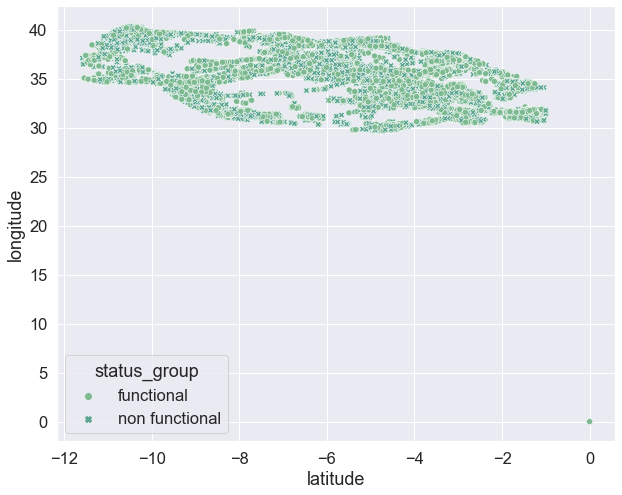

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=DF['latitude'],y=DF['longitude'], data=DF, hue=('status_group'), style=('status_group'))

After analyzing the longitude and latitude column, I was hoping to create a new column referencing the data points
of lat and long combined. Unfortunately I was not able to bring this idea to life. I will have to remove the lat and long
columns as a result of this.

In [26]:
DF = DF.drop(DF[['latitude','longitude']], axis = 1)

In [27]:
DF

,status_group,amount_tsh,funder,gps_height,installer,wpt_name,basin,subvillage,region,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,payment,water_quality,quantity,source_type,waterpoint_type
0,functional,6000.0,Roman,1390,Roman,none,Lake Nyasa,Mnyusi B,Iringa,1.0,VWC,0,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe
1,functional,0.0,Grumeti,1399,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,0.0,Other,1,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,functional,25.0,Lottery Club,686,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,1.0,VWC,1,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple
3,non functional,0.0,Unicef,263,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,1.0,VWC,1,1986,submersible,vwc,never pay,soft,dry,borehole,communal standpipe multiple
4,functional,0.0,Action In A,0,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1.0,None,1,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,Germany Republi,1210,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,1.0,Water Board,1,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe
59396,functional,4700.0,Cefa-njombe,1212,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,1.0,VWC,1,1996,gravity,vwc,pay annually,soft,enough,river/lake,communal standpipe
59397,functional,0.0,No Funder,0,No Installer,Mashine,Rufiji,Madungulu,Mbeya,1.0,VWC,0,0,handpump,vwc,pay monthly,fluoride,enough,borehole,hand pump
59398,functional,0.0,Malec,0,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,1.0,VWC,1,0,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump


In [28]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55083 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           55083 non-null  object 
 1   amount_tsh             55083 non-null  float64
 2   funder                 55083 non-null  object 
 3   gps_height             55083 non-null  int64  
 4   installer              55083 non-null  object 
 5   wpt_name               55083 non-null  object 
 6   basin                  55083 non-null  object 
 7   subvillage             55083 non-null  object 
 8   region                 55083 non-null  object 
 9   public_meeting         55083 non-null  float64
 10  scheme_management      55083 non-null  object 
 11  permit                 55083 non-null  object 
 12  construction_year      55083 non-null  int64  
 13  extraction_type_class  55083 non-null  object 
 14  management             55083 non-null  object 
 15  pa

In [29]:
for col in DF.columns:
    print(col, DF[col].nunique())

status_group 2
amount_tsh 98
funder 1855
gps_height 2419
installer 2089
wpt_name 35005
basin 9
subvillage 18483
region 21
public_meeting 2
scheme_management 12
permit 3
construction_year 55
extraction_type_class 7
management 12
payment 7
water_quality 8
quantity 5
source_type 7
waterpoint_type 7
